In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
from imageplot import mat_plt,sub_mat_plot
%matplotlib notebook

In [2]:
td = pd.read_csv('/home/putus/PROJECT/EEG/chb21_01.csv')

In [144]:
td.head(10)

,'FP1-F7','F7-T7','T7-P7','P7-O1','-','FP1-F3','F3-C3','C3-P3','P3-O1','-'.1,...,'FP2-F8','F8-T8','T8-P8','P8-O2','-'.4,'P7-T7','T7-FT9','FT9-FT10','FT10-T8','T8-P8'.1
1,-107.057,14.457,-8.987,28.523,0.000,-91.038,-20.317,10.940,27.350,0.000,...,-84.786,125.031,-145.348,35.946,0.000,8.987,28.523,-7.424,17.582,-145.348
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-0.391,0.000,0.781,0.000,0.000,0.000,0.000,0.000,0.000,0.781
4,0.391,0.000,0.000,0.000,0.000,0.391,0.391,0.000,0.000,0.000,...,-1.172,0.391,0.781,0.000,0.000,0.000,0.000,0.000,0.000,0.781
5,0.000,0.000,-0.391,0.000,0.000,0.781,-0.781,0.000,0.000,0.000,...,2.735,1.172,-8.205,1.954,0.000,0.391,0.391,0.781,1.954,-8.205
6,-1.563,-0.781,-1.172,0.000,0.000,-2.735,-1.563,0.000,0.000,0.000,...,6.642,-3.516,-3.907,-0.391,0.000,1.172,1.172,0.000,0.000,-3.907
7,-4.689,-0.391,0.391,0.000,0.000,-5.470,0.391,0.781,0.000,0.000,...,-3.126,-3.126,13.284,-6.252,0.000,-0.391,-0.391,-1.563,-2.735,13.284
8,-2.344,3.516,1.172,0.391,0.000,-0.391,0.781,2.344,0.391,0.000,...,-11.722,0.781,17.192,-4.689,0.000,-1.172,-3.126,-0.781,-3.907,17.192
9,3.126,3.126,0.781,0.000,0.000,5.079,0.000,1.172,1.172,0.000,...,0.781,1.172,-3.907,2.735,0.000,-0.781,-0.781,1.172,0.000,-3.907
10,2.735,-1.563,0.781,-0.391,0.000,0.781,0.391,-1.172,0.781,0.000,...,15.238,-5.079,-5.470,1.172,0.000,-0.781,2.735,0.781,-0.391,-5.470


In [4]:
head    = list(td.columns.values)
td.drop(head[0],axis=1,inplace=True) # drop Time and date
td.drop([0],inplace=True) # drop 0 columns

In [5]:
s1 = td[head[1]]

In [11]:
# creat a matrix
mat = np.zeros((len(s1),(len(head))))
for i in range(1,len(head)):
    mat[:,i] = td[head[i]]
    sleep(0.01)

# every mat contain probs mat[:,i] total 28 start form mat1

In [118]:
# source : https://stackoverflow.com/questions/8245687/numpy-root-mean-squared-rms-smoothing-of-a-signal
def window_rms(a, window_size):
            a2 = np.power(a,2)
            window = np.ones(window_size)/float(window_size)
            return np.sqrt(np.convolve(a2, window, 'valid'))

In [129]:
rms = np.zeros((15351,len(head)))
r = window_rms(mat[:,1],10)
for i in range(1,len(head)):
    rms[:,i] = window_rms(mat[:,i],10)

In [141]:
std_data=[]
for i in range(1,len(head)):
    std_data.append(np.std(rms[:,i]))
    
mean_data=[]
for i in range(1,len(head)):
    mean_data.append(np.mean(rms[:,i]))

<IPython.core.display.Javascript object>


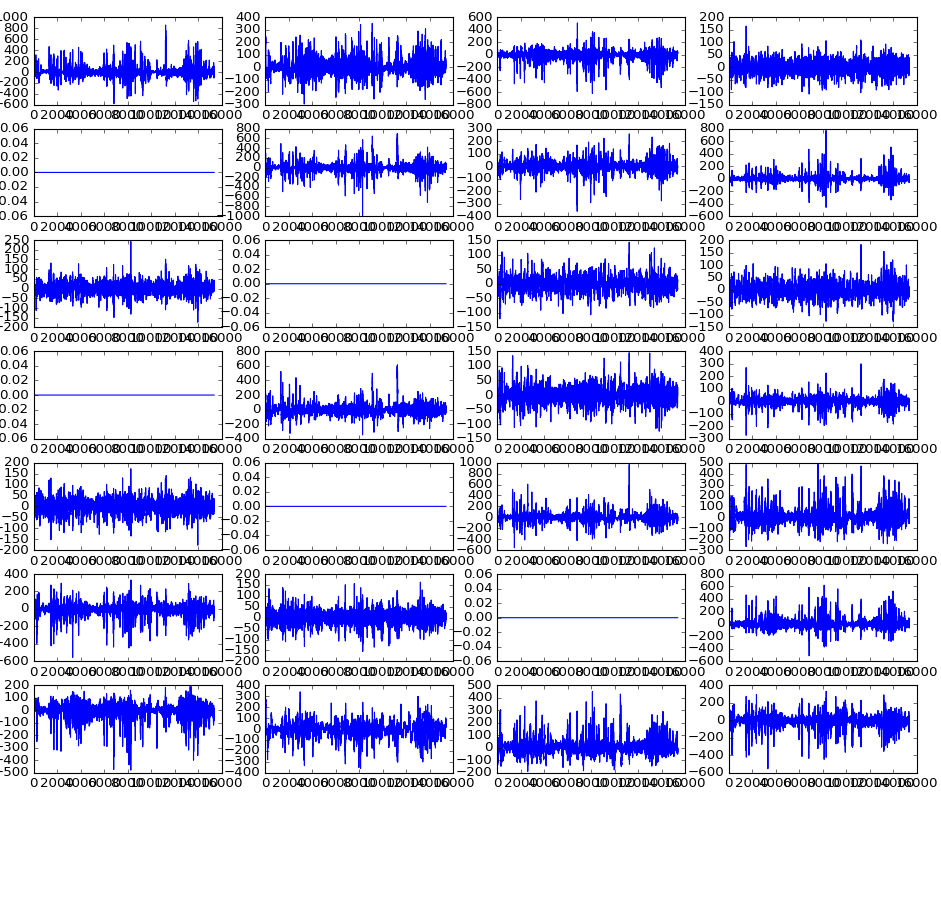

In [124]:
mat_plt(mat)

<IPython.core.display.Javascript object>


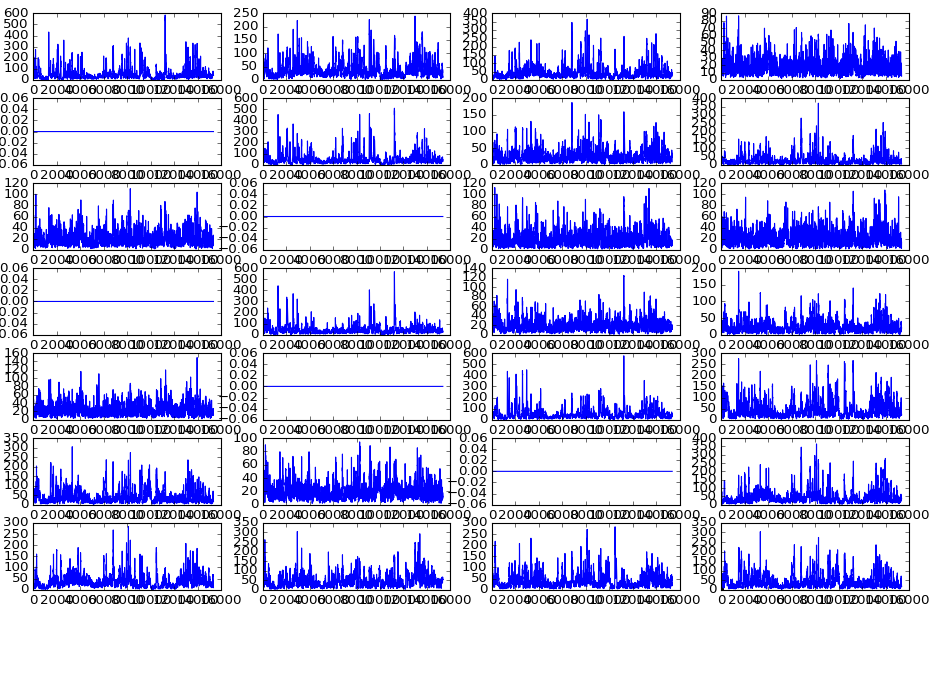

In [125]:
mat_plt(rms)

<IPython.core.display.Javascript object>


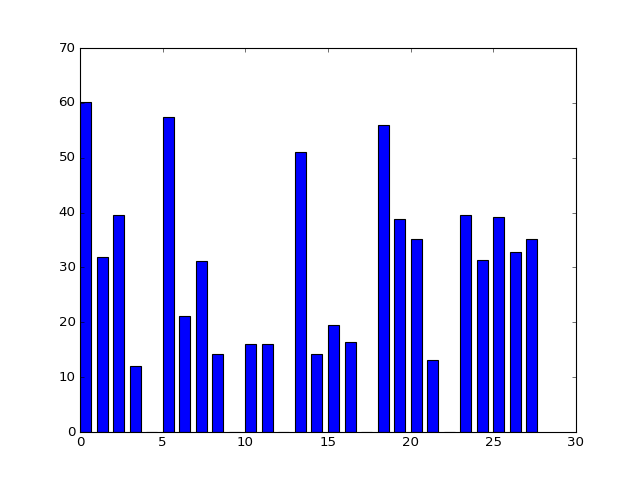

In [140]:
N = len(std_data)
x = range(N)
width = 1/1.5
fig=plt.figure()
plt.bar(x,std_data,width)
fig = plt.gcf()
plt.show()

In [148]:
normalize=[]
for i in range(len(std_data)):
    if(std_data[i]!=0):
        normalize.append(std_data[i])

<IPython.core.display.Javascript object>


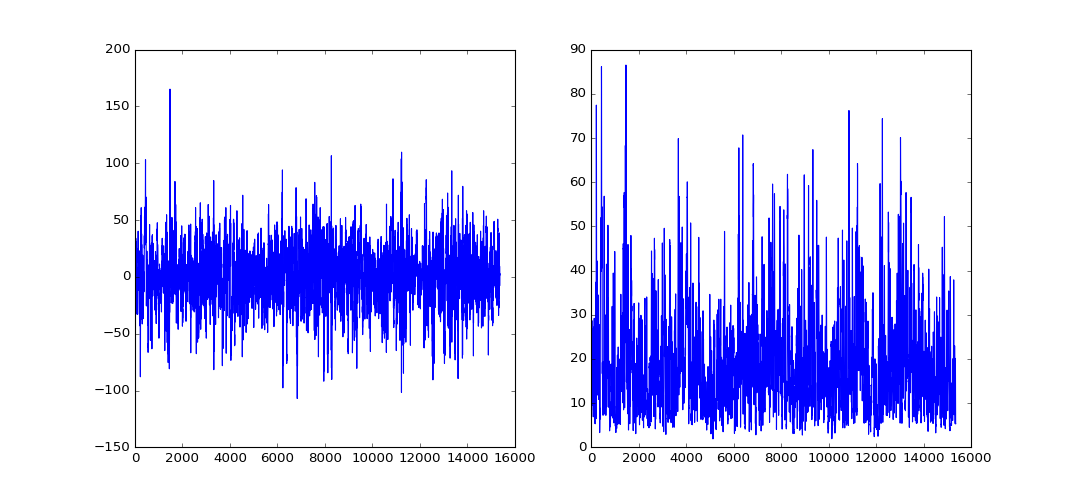

In [160]:
fig=plt.figure
plt.subplot(1,2,1)
plt.plot(mat[:,4])
plt.subplot(1,2,2)
plt.plot(window_rms(mat[:,4],10))
plt.show()